# **RISK ANALYSIS AND EVALUATION TO SUSTAIN DIVERSIFICATION INTO AVIATION DIVISION**

## **BUSINESS OBJECTIVE**

The objective of this project is to facilitate KOJ And Associates entry into aviation division by identifying aircraft with minimal risk for both commercial and private operations.
Through analysis of Aviation Data from the year 1948-2022, this projet's deliverables will be useful for recommendations on aircrafts' purchases having the lowest risk for the company to start the new business endeavor.

## **DATA OVERVIEW**

This dataset is derived from [The NTSB Aviation Accident Dataset up to Feb 2021](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) roviding detailed information on civil aviation accidents and selected incidents within the United States, it's territories and possessions and international waters as from 1962 and later.

## **KEY FIELDS OF RESEARCH**

- Purpose of flight
- Engine type
- Aircraft model and make( Stinson, Cessna, Beech)
- Broad phase of flight
- Weather conditions

## **OBJECTIVES**

**PRIMARY OBJECTIVES**

Analyzing and evaluating aircrafts with the lowest risks based on historical accident data to ensure passengers are safe and the company's operations are fluid and not halted. This analysis will be useful for the company's nw aviation division that focuses on operating aircrafts for commercial and private enterprise.

**SECONDARY OBJECTIVES**

- Analyzing accident trends and causes for different aircrafts to identify patterns of risk factors such as broad phase of flight and aircraft model to help the company understand key drivers of aircraft accidents.

- Evaluating safety performance of aircrafts in commercial and private operations providing recommendations best suited for the enterprise operations.

## **METHODOLOGY**

**DATA CLEANING**

Removing duplicated records from the Accident dataset(1948-2022) and standardizing the data formats for uniformity.


In [96]:
#import necessary libraries for data analysis and visualization

# import pandas library for data manipulation and analysis 
import pandas as pd

# import NumPy for numerical operations
import numpy as np

In [97]:
#load the aviation data set into the pandas dataframe using the function 'read_csv'

df=pd.read_csv("AviationData.csv", encoding='ISO-8859-1',low_memory=False)

#display the first few rows of the dataframe 
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [98]:
#check for duplicates in the dataframe 
df.duplicated().value_counts()

False    88889
dtype: int64

In [99]:
#check for missing values in each column of the dataframe
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [100]:
# Remove the least useful columns for analysis
df = df.drop(columns=['Airport.Name'])

In [101]:
df=df.drop(columns=['Amateur.Built'])

In [102]:
df=df.drop(columns=['Event.Id', 'Investigation.Type', 'Registration.Number', 'Publication.Date'])

In [9]:
#reload the dataframe
df.head()

,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,...,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,Fatal(3),Destroyed,NaN,...,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,...,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,...,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


In [103]:
#fill the missing values in the dataframe with a dash '-'
df.fillna('-', inplace=True)

In [104]:
#reload the dataframe
df.head()

,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,Aircraft.damage,Aircraft.Category,...,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,-,-,-,Fatal(2),Destroyed,-,...,-,Personal,-,2,0,0,0,UNK,Cruise,Probable Cause
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,-,-,-,Fatal(4),Destroyed,-,...,-,Personal,-,4,0,0,0,UNK,Unknown,Probable Cause
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,-,Fatal(3),Destroyed,-,...,-,Personal,-,3,-,-,-,IMC,Cruise,Probable Cause
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,-,-,-,Fatal(2),Destroyed,-,...,-,Personal,-,2,0,0,0,IMC,Cruise,Probable Cause
4,CHI79FA064,1979-08-02,"Canton, OH",United States,-,-,-,Fatal(1),Destroyed,-,...,-,Personal,-,1,2,-,0,VMC,Approach,Probable Cause


In [105]:
# Convert 'Event.Date' to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

In [106]:
#verify the changes in the date columns 
df[['Event.Date']].head()

,Event.Date
0,1948-10-24
1,1962-07-19
2,1974-08-30
3,1977-06-19
4,1979-08-02


In [107]:
# Create a new column with the desired format (Full month name and year)
df['MonthYear'] = df['Event.Date'].dt.strftime('%B %Y')


In [108]:
df[['MonthYear']].head()

,MonthYear
0,October 1948
1,July 1962
2,August 1974
3,June 1977
4,August 1979


In [109]:
#standardizing column names by removing periods 
df.columns = df.columns.str.replace('.', ' ')


In [110]:
df.head()

,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Injury Severity,Aircraft damage,Aircraft Category,...,Purpose of flight,Air carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status,MonthYear
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,-,-,-,Fatal(2),Destroyed,-,...,Personal,-,2,0,0,0,UNK,Cruise,Probable Cause,October 1948
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,-,-,-,Fatal(4),Destroyed,-,...,Personal,-,4,0,0,0,UNK,Unknown,Probable Cause,July 1962
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,-,Fatal(3),Destroyed,-,...,Personal,-,3,-,-,-,IMC,Cruise,Probable Cause,August 1974
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,-,-,-,Fatal(2),Destroyed,-,...,Personal,-,2,0,0,0,IMC,Cruise,Probable Cause,June 1977
4,CHI79FA064,1979-08-02,"Canton, OH",United States,-,-,-,Fatal(1),Destroyed,-,...,Personal,-,1,2,-,0,VMC,Approach,Probable Cause,August 1979


In [111]:
#cleaning up text data that may have unnecessary space
df.columns = df.columns.str.strip()

In [112]:
df.head()

,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Injury Severity,Aircraft damage,Aircraft Category,...,Purpose of flight,Air carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status,MonthYear
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,-,-,-,Fatal(2),Destroyed,-,...,Personal,-,2,0,0,0,UNK,Cruise,Probable Cause,October 1948
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,-,-,-,Fatal(4),Destroyed,-,...,Personal,-,4,0,0,0,UNK,Unknown,Probable Cause,July 1962
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,-,Fatal(3),Destroyed,-,...,Personal,-,3,-,-,-,IMC,Cruise,Probable Cause,August 1974
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,-,-,-,Fatal(2),Destroyed,-,...,Personal,-,2,0,0,0,IMC,Cruise,Probable Cause,June 1977
4,CHI79FA064,1979-08-02,"Canton, OH",United States,-,-,-,Fatal(1),Destroyed,-,...,Personal,-,1,2,-,0,VMC,Approach,Probable Cause,August 1979


In [113]:
df.columns.tolist()

['Accident Number',
 'Event Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport Code',
 'Injury Severity',
 'Aircraft damage',
 'Aircraft Category',
 'Make',
 'Model',
 'Number of Engines',
 'Engine Type',
 'FAR Description',
 'Schedule',
 'Purpose of flight',
 'Air carrier',
 'Total Fatal Injuries',
 'Total Serious Injuries',
 'Total Minor Injuries',
 'Total Uninjured',
 'Weather Condition',
 'Broad phase of flight',
 'Report Status',
 'MonthYear']

In [114]:
#combining Make and Model column into a new colum aircraft name 
df['Aircraft Name'] = df[['Make', 'Model']].agg(' '.join, axis=1)

In [116]:
df.head()

,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Injury Severity,Aircraft damage,Aircraft Category,...,Air carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status,MonthYear,Aircraft Name
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,-,-,-,Fatal(2),Destroyed,-,...,-,2,0,0,0,UNK,Cruise,Probable Cause,October 1948,Stinson 108-3
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,-,-,-,Fatal(4),Destroyed,-,...,-,4,0,0,0,UNK,Unknown,Probable Cause,July 1962,Piper PA24-180
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,-,Fatal(3),Destroyed,-,...,-,3,-,-,-,IMC,Cruise,Probable Cause,August 1974,Cessna 172M
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,-,-,-,Fatal(2),Destroyed,-,...,-,2,0,0,0,IMC,Cruise,Probable Cause,June 1977,Rockwell 112
4,CHI79FA064,1979-08-02,"Canton, OH",United States,-,-,-,Fatal(1),Destroyed,-,...,-,1,2,-,0,VMC,Approach,Probable Cause,August 1979,Cessna 501


In [117]:
df.columns


Index(['Accident Number', 'Event Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport Code', 'Injury Severity', 'Aircraft damage',
       'Aircraft Category', 'Make', 'Model', 'Number of Engines',
       'Engine Type', 'FAR Description', 'Schedule', 'Purpose of flight',
       'Air carrier', 'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad phase of flight', 'Report Status', 'MonthYear', 'Aircraft Name'],
      dtype='object')

In [121]:
df.head()

,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Injury Severity,Aircraft damage,Aircraft Category,...,Air carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Report Status,MonthYear,Aircraft Name
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,-,-,-,Fatal(2),Destroyed,-,...,-,2,0,0,0,UNK,Cruise,Probable Cause,October 1948,Stinson 108-3
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,-,-,-,Fatal(4),Destroyed,-,...,-,4,0,0,0,UNK,Unknown,Probable Cause,July 1962,Piper PA24-180
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,-,Fatal(3),Destroyed,-,...,-,3,-,-,-,IMC,Cruise,Probable Cause,August 1974,Cessna 172M
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,-,-,-,Fatal(2),Destroyed,-,...,-,2,0,0,0,IMC,Cruise,Probable Cause,June 1977,Rockwell 112
4,CHI79FA064,1979-08-02,"Canton, OH",United States,-,-,-,Fatal(1),Destroyed,-,...,-,1,2,-,0,VMC,Approach,Probable Cause,August 1979,Cessna 501


## **DATA ANALYSIS AND VISUALIZATION**

 - Performing Exploratory Data Analysis (EDA) to understand accident distributions.
 - Using statistical methods to evaluate correlations between aircraft make and model,weather, accident frequency,injury severity, broad phase of flight and purpose of flight.


**EXPLORATORY DATA ANALYSIS(EDA)**

**ANALYSING ACCIDENT FREQUENCY BY AIRCRAFT NAME**
- **Grouping By Aircraft Name**

Grouping information from the dataframe by make and model is a fundamental step in to understand how different aircraft models and makes are associated with accident occurrences. 

In [140]:
#Sort data by accident count
accident_counts = df.groupby('Aircraft Name').size().reset_index(name='Accident_Count')


- **Visualize the data using a bar graph to understand the distribution of accidents across different aircrafts**

In [141]:
#Import matplotlib for data visualization in bar graphs
import matplotlib.pyplot as plt

In [142]:
#Import seaborn for enhanced statistical data visualization
import seaborn as sns

In [143]:
#Sort data by accident count
accident_counts = accident_counts.sort_values(by='Accident_Count', ascending=False)

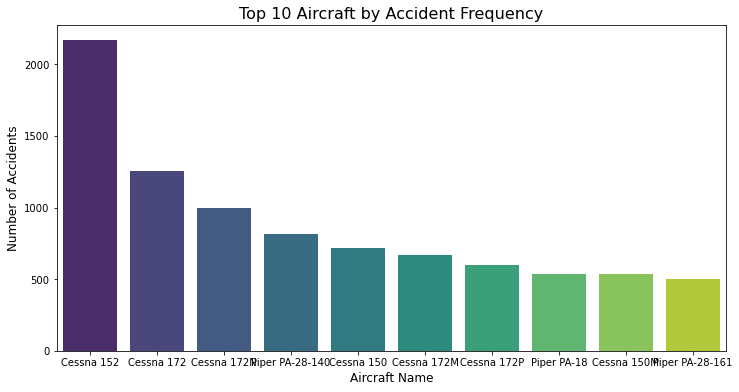

In [144]:
#Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=accident_counts.head(10), x='Aircraft Name', y='Accident_Count', palette='viridis')

#Add labels and title
plt.title('Top 10 Aircraft by Accident Frequency',fontsize=16)
plt.xlabel('Aircraft Name',fontsize=12)
plt.ylabel('Number of Accidents',fontsize=12)


#Show the plot
plt.show()

Cessna 152 and Cessna 172 from the graph indicates that these models have the highest accident rates compared to Cessna 150M and Piper PA-28-161.
The difference in accident rates between these models suggests that factors such as model and make  play  a critical role in deciding on airfcrafts to purchase.

**ANALYZING HOW PURPOSE OF FLIGHT INFLUENCES AIRCRAFT ACCIDENTS**

- Analyzing the relationship between purpose of flight and accidents.

In [145]:
#Group the purpose of flight with below 0.03 as other
other = 0.03

sizes = df['Purpose of flight'].value_counts(normalize=True)

In [146]:
#Group the 'other' categories
sizes_aggregated = sizes[sizes > other]
sizes_aggregated['Other'] = sizes[sizes <= other].sum()

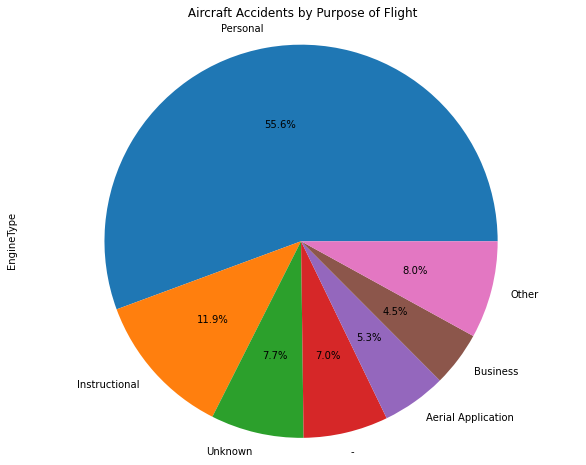

In [190]:
#Pie chart  for aircraft purposes  that caused accidents
plt.figure(figsize=(10, 8))
plt.pie(sizes_aggregated, labels=sizes_aggregated.index, autopct='%1.1f%%', normalize=False)
#Add labels and title
plt.title(' Aircraft Accidents by Purpose of Flight')
plt.axis('equal')
plt.ylabel('EngineType')

plt.show()

- **Personal purpose of flight (55.6%)** represents the primary purpose of flight which accounts for the majority of accidents. It suggests that this category of flights experiences a higher accident rate, either because it has the highest number of flights or because of inherent risks associated with this purpose.

- **Business/Commercial(4.5%)** represents minor contributors to the accident count, which could reflect special purposes like military, medical,cargo/freight and chartered flights which have fewer total flights and correspondingly fewer accidents.

- **Business/Commercial(4.5%)** represents minor contributors to the accident count, which could reflect special purposes like military, medical,cargo/freight and chartered flights which have fewer total flights and correspondingly fewer accidents.

**INVESTIGATING THE CORRELATION BETWEEN ENGINE TYPES AND AIRCRAFT ACCIDENTS**

- Exploring the relationship between different engine types and with aircraft accidents. By analyzing data on engine failures and incidents, we aim to uncover patterns that highlight which engines more prone to contributing to accidents. This analysis will helpinform aircraft engines to invest in,safety measures and improvements design and maintenance.

In [148]:
#Group the dataset by engine type to count the number of accidents associated with each type

In [149]:
engine_accident_counts = df['Engine Type'].value_counts().reset_index()

In [150]:
top_ten_engines = engine_accident_counts.head(10)

In [151]:
top_ten_engines

,index,Engine Type
0,Reciprocating,69530
1,-,7077
2,Turbo Shaft,3609
3,Turbo Prop,3391
4,Turbo Fan,2481
5,Unknown,2051
6,Turbo Jet,703
7,None,19
8,Geared Turbofan,12
9,Electric,10


In [153]:
#Sort data by accident count
accident_counts = df.groupby('Aircraft Name').size().reset_index(name='Accident_Count')
#Plot the data  on a bar graph by engine accident counts
engine_accident_counts = df.groupby('Engine Type').size().reset_index(name='Accident_Count')

In [154]:
# Check for missing values in the 'EngineType' column
(df['Engine Type'].isnull().sum())

0

In [155]:
#drop rows with missing engine type data
df = df.dropna(subset=['Engine Type'], axis=0)


In [156]:
# Check unique values in the engine type column
unique_phases = df['Engine Type'].unique()

In [157]:
# Remove entries with a dash
df = df[df['Engine Type'] != '-']

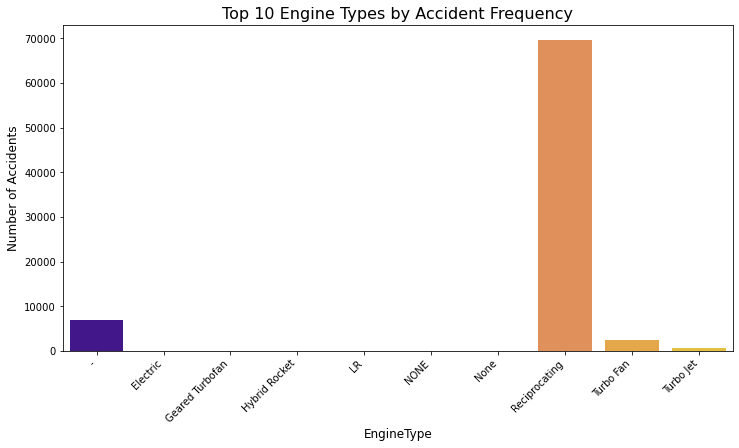

In [158]:
#Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=engine_accident_counts.head(10), x='Engine Type', y='Accident_Count', palette='plasma')
#Add labels and title
plt.title('Top 10 Engine Types by Accident Frequency',fontsize=16)
plt.xlabel('EngineType',fontsize=12)
plt.ylabel('Number of Accidents',fontsize=12)


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

#Show the plot
plt.show()

- Geared turbofan engines, which dominate the commercial aviation market show lower accident rates. This can be attributed to enhanced safety protocols, better maintenance practices and the rigorous oversight with commercial operations. Understanding these distinctions is crucial for evaluating the safety landscape in both commercial and private aviation.

- The information derrived from the above bar graph above emphasizes the importance of safety performance in aircraft engines when evaluating investment opportunities in both commercial and private aviation. By recognizing the higher accident rates associated with Reciprocating and Turbo Shaft engines, investors can make informed decisions, aligning their strategies with companies that demonstrate a commitment to enhancing safety

**EXAMINING HOW THE FLIGHT PHASES,WEATHER CONDITIONS AND AIRCRAFT ACCIDENTS ARE RELATED**  

- This analysis focuses on how different phases of flight contribute to the occurrence of aircraft accidents. By categorizing accidents based on the broad phases of flight such as cruise,takeoff,taxi,descent,approach and landing we can identify trends and patterns that may indicate which phases are more prone to accidents.

In [161]:
# Check for missing values in the 'Broad.phase.of.flight' column
(df['Broad phase of flight'].isnull().sum())

0

In [162]:
#drop rows with missing flight phase data
df.dropna(subset=['Broad phase of flight'], inplace=True)


In [165]:
# Check unique values in the 'Broadphaseofflight' column
unique_phases = df['Broad phase of flight'].unique()

In [166]:
# Remove entries with a dash
df = df[df['Broad phase of flight'] != '-'] 

In [167]:
df['Broad phase of flight']

0             Cruise
1            Unknown
2             Cruise
3             Cruise
5              Climb
            ...     
63907       Approach
63908    Maneuvering
63909    Maneuvering
63910        Takeoff
63911        Landing
Name: Broad phase of flight, Length: 61324, dtype: object

In [168]:
(df['Broad phase of flight'].isnull().sum())

0

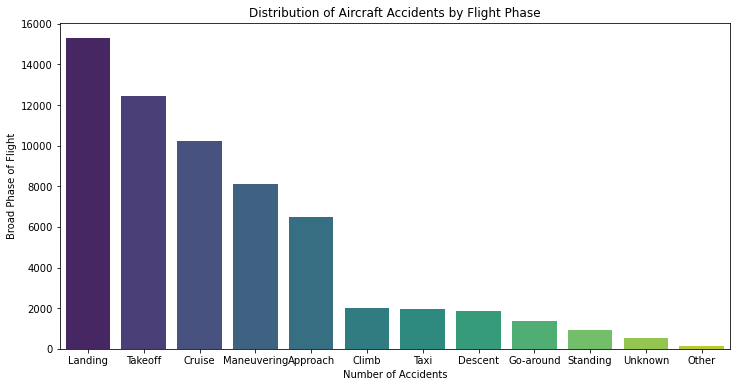

In [170]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(x='Broad phase of flight', data=df, 
              order=df['Broad phase of flight'].value_counts().index, 
              palette='viridis')

# Add labels and title
plt.title('Distribution of Aircraft Accidents by Flight Phase')
plt.xlabel('Number of Accidents')
plt.ylabel('Broad Phase of Flight')

#show the plot
plt.show()

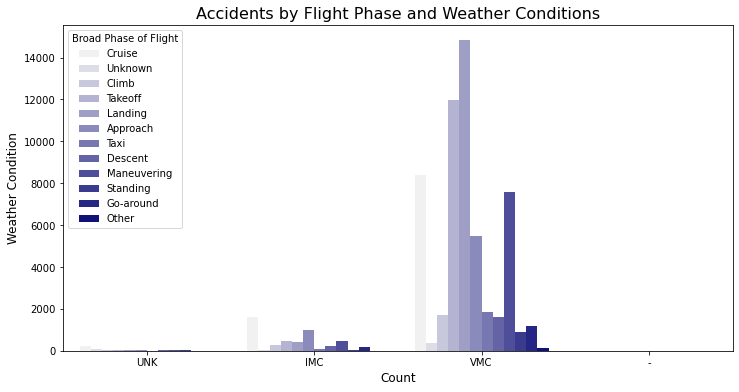

In [178]:
#Analyzing accidents by flight phase and weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='Weather Condition', hue='Broad phase of flight', data=df, color='darkblue')

#Add labels and title
plt.title('Accidents by Flight Phase and Weather Conditions',fontsize=16)
plt.xlabel('Count',fontsize=12)
plt.ylabel('Weather Condition',fontsize=12)

#Show the plot
plt.legend(title='Broad Phase of Flight')
plt.show()

- The above analysis shows a clear relationship between various phases of flight and aircraft accidents. 
By identifying which phases are more prone to accidents as from the graph, landing and takeoff, the investor  in the aviation division can implement targeted safety measures and improve pilot training ultimately enhancing overall aviation safety for both commercial and private operations. 
- Further analysis could involve exploring additional factors such as weather conditions to gain a more comprehensive understanding of the data.Among the various phases of flight, landing, takeoff and cruise are the most significantly impacted by adverse weather conditions.  

 # **RECOMMENDATIONS**

**From the above analysis and visulizations;**

- Prioritizing models with lower accident rates:

The Cessna 152 and Cessna 172 show higher accident rates compared to the Cessna 150M and Piper PA-28-161. This suggests that when considering aircraft for purchase, it would be prudent to focus on models with lower accident rates such as the Cessna 150M or Piper PA-28-161. These aircraft models from the above analysis have better safety records and align with a strategy focused on minimizing risk.

- Considering Usage Patterns

From the indications above,personal purpose of flight category is responsible for 55.6% of accidents, highlighting a greater risk associated with non-commercial operations. 
In contrast,commercial flights account for only 4.5% of accident occurrences. This suggests that business and commercial operations such as cargo, medical or charter flights will highly provide a safer environment potentiallybecause of tight regulations, improved maintenance practices or a lower overall volume of flights. Therefore, considering an expansion into business or commercial aviation, particularly in specialized operations represent a more secure investment opportunity.

- Investing in aircraft with safer engine types

Analysis of engine types has revealed that Geared Turbofan engines, widely used in commercial aviation, have significantly lower accident rates due to superior safety measures and strict regulatory oversight. In contrast, Reciprocating and Turbo Shaft engines are associated with higher accident rates. Therefore, investing in aircraft that utilize geared turbofan engines, known for their reliability is likely to minimize operational risks and promote a safety-first approach.

- Frequent weather updates

Weather conditions, particularly during landing, takeoff, and cruise phases, significantly affect accident rates. It would be beneficial to integrate weather-related risk mitigation strategies such as advanced weather monitoring systems, into future investments. This can reduce accident risks and improve overall operational safety for both commercial and private operations.

- Aligning investments with safety-focused Companies:

Companies that prioritize and have demonstrated a commitment to enhancing aircraft safety through engine technology advancements, stringent maintenance protocols and comprehensive safety measures should be the primary targets for investment. Focusing on aircraft with lower accident rates and those with better safety records will help ensure the long-term success of the aviation division.

# **CONCLUSION**

The analysis and evaluation  of aircraft accidents across various dimensions including accident frequency by aircraft name, the influence of flight purpose, the correlation between engine types and the relationship between flight phases and weather conditions provides critical insights into aviation safety.

Examining accident frequency by aircraft name highlight specific models that are more prone to accidents, underscoring the needs for targeted safety measures and maintenance protocols.

Furthermore understanding how the purpose of flight influences accident rates highlights that non-commercial operations carry greater risks suggesting that investments in commercial aviation might yield safer outcomes.
Engine types also present significant differences in reliability particularly emphasizing the need to prioritize geared Turbofan engines over Reciprocating and Turbo Shaft engines to enhance safety.

The examination of flight phases and weather conditions illustrates the multifaceted nature of aviation risks illustrating  that adverse weather significantly impacts critical phases such as takeoff and landing.

These findings outline the importance of a holistic approach to aviation safety, where data-driven insights can inform better decision-making, improve operational protocols, and ultimately reduce the incidence of accidents in the aviation industry. By implementing targeted strategies based on these analyses, stakeholders can foster a safer flying environment.

In [179]:
df_relevant.to_csv('cleaned_AviationData.csv', index =False)

In [181]:
#Loading cleaned data
df_cleaned = pd.read_csv("cleaned2_AviationData.csv", low_memory=False)

In [182]:
df_cleaned


,Event.Date,Location,Make,Model,Purpose.of.flight,Engine.Type,Injury.Severity,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,1948-10-24,"MOOSE CREEK, ID",Stinson,108-3,Personal,Reciprocating,Fatal(2),UNK,Cruise,2.0,0.0,0.0,0.0
1,1962-07-19,"BRIDGEPORT, CA",Piper,PA24-180,Personal,Reciprocating,Fatal(4),UNK,Unknown,4.0,0.0,0.0,0.0
2,1974-08-30,"Saltville, VA",Cessna,172M,Personal,Reciprocating,Fatal(3),IMC,Cruise,3.0,NaN,NaN,NaN
3,1977-06-19,"EUREKA, CA",Rockwell,112,Personal,Reciprocating,Fatal(2),IMC,Cruise,2.0,0.0,0.0,0.0
4,1979-08-02,"Canton, OH",Cessna,501,Personal,NaN,Fatal(1),VMC,Approach,1.0,2.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2022-12-26,"Annapolis, MD",PIPER,PA-28-151,Personal,NaN,Minor,NaN,NaN,0.0,1.0,0.0,0.0
88885,2022-12-26,"Hampton, NH",BELLANCA,7ECA,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
88886,2022-12-26,"Payson, AZ",AMERICAN CHAMPION AIRCRAFT,8GCBC,Personal,NaN,Non-Fatal,VMC,NaN,0.0,0.0,0.0,1.0
88887,2022-12-26,"Morgan, UT",CESSNA,210N,Personal,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [188]:
df[['Aircraft Name']].head()

,Aircraft Name
0,Stinson 108-3
1,Piper PA24-180
2,Cessna 172M
3,Rockwell 112
5,Mcdonnell Douglas DC9
